<a href="https://colab.research.google.com/github/ainesko/DLS/blob/main/DLS_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

Загрузим данные с диска

In [2]:
def download_from_disk(id):
  import gdown
  gdown.download(f'https://drive.google.com/uc?id={id}&confirm=t', quiet=False)

In [3]:
download_from_disk('1K-tf97Hjklw_eHFxeup36bBpElSC1hrb')

Downloading...
From: https://drive.google.com/uc?id=1K-tf97Hjklw_eHFxeup36bBpElSC1hrb&confirm=t
To: /content/train.csv
100%|██████████| 664k/664k [00:00<00:00, 52.9MB/s]


In [4]:
download_from_disk('1ZDlKZdX0arZLQfqu9qNy7Oh2BvdeE_1Z')

Downloading...
From: https://drive.google.com/uc?id=1ZDlKZdX0arZLQfqu9qNy7Oh2BvdeE_1Z&confirm=t
To: /content/test.csv
100%|██████████| 218k/218k [00:00<00:00, 58.1MB/s]


In [5]:
download_from_disk('1FMEFDp-SBt5yxka5WAetGpDd7Ry_3szh')

Downloading...
From: https://drive.google.com/uc?id=1FMEFDp-SBt5yxka5WAetGpDd7Ry_3szh&confirm=t
To: /content/submission.csv
100%|██████████| 14.7k/14.7k [00:00<00:00, 23.0MB/s]


In [6]:
data = pd.read_csv('./train.csv')

In [7]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### 1) Посмотрим на случайные строчки. 

In [8]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1927,4,29.65,118.5,Male,0,No,No,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,1
2540,47,41.90,1875.25,Female,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,No,Mailed check,0
3638,72,109.65,7880.25,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,0
433,58,105.20,6225.4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
1764,31,79.20,2497.2,Female,0,No,No,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,0
3419,33,110.45,3655.45,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1
943,3,20.00,61.7,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0
1798,41,98.80,3959.15,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
555,1,50.15,50.15,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
130,72,110.75,7751.7,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,0


### 2) Посмотрим, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, заменим их на что-то.

In [9]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как мы видим, нет nan'ов, но тип данных в столбце TotalSpent не числовой, как мы ожидали.

Попробуем удалить пробелы и изменить тип данных на числовой.

In [11]:
data = data.replace(' ', np.nan)
data = data.dropna(axis=0)
data.TotalSpent = data.TotalSpent.astype(float) 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### 1) Для численных признаков строим гистограммы, а для категориальных круговые диаграммы.

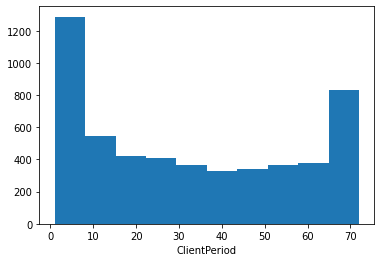

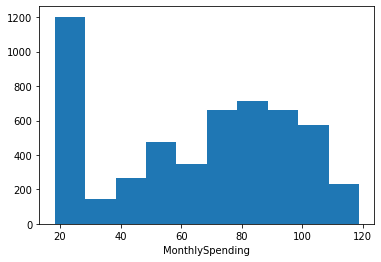

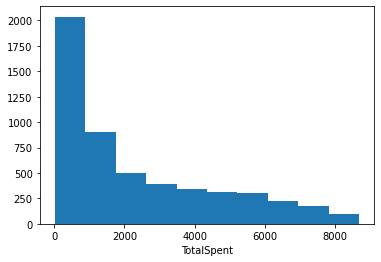

In [13]:
for col in num_cols:
  plt.hist(data[col])
  plt.xlabel(col)  
  plt.show()

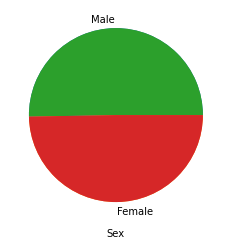

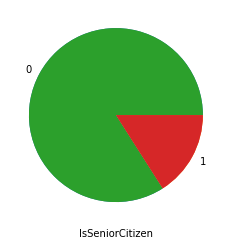

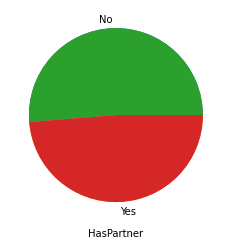

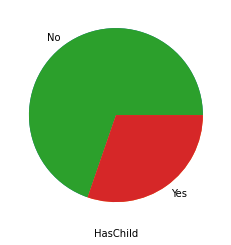

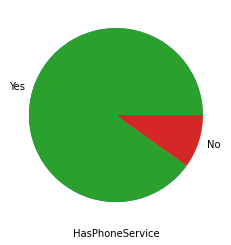

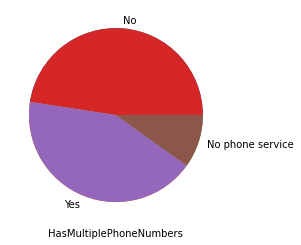

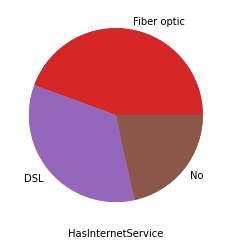

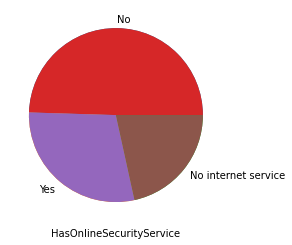

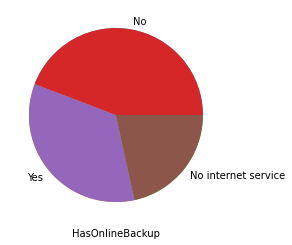

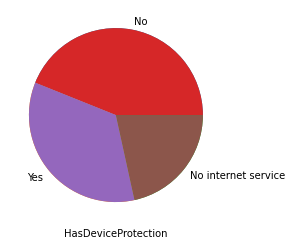

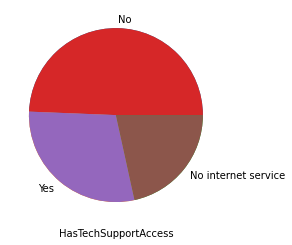

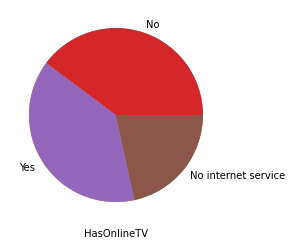

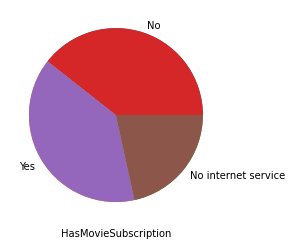

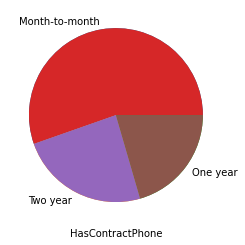

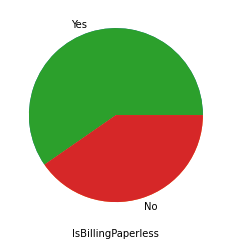

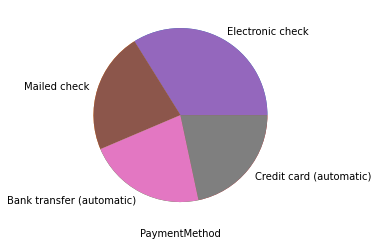

In [14]:
for col in cat_cols:
  plt.pie(data[col].value_counts())
  x = data[col].value_counts()
  plt.pie(labels=x.index, x=x)
  plt.xlabel(col)
  plt.show()

### 2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

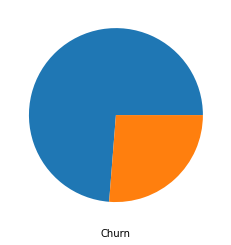

In [15]:
plt.pie(data[target_col].value_counts())
plt.xlabel(target_col)
plt.show()

Классы не являются сбалансированными.

## Применение линейных моделей (3 балла)


In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

### 1) Обработаем данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируем числовые признаки, а категориальные закодируем с помощью one-hot-encoding'а.

In [17]:
dum = pd.get_dummies(data[cat_cols])
X = pd.concat((data[num_cols], dum), axis=1)
y = data[target_col]

### 2) Разделим на  train/valid. Используем LogisticRegressionCV.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [19]:
C = [100, 10, 1, 0.1, 0.01, 0.001]
model = LogisticRegressionCV(Cs=C, random_state=777, refit=True, scoring='roc_auc')
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], random_state=777,
                     scoring='roc_auc')

In [20]:
best_C = model.C_[0] 
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

### Укажем какое лучшее качество и с какими параметрами нам удалось получить

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8439820712432178

In [22]:
best_C

10.0

## Применение градиентного бустинга (2 балла)


In [25]:
#!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [26]:
import catboost

In [27]:
cat_feat = np.array([data.columns.get_loc(c) for c in cat_cols])

In [28]:
X_origin = data[feature_cols]
y = data[target_col]


X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin.values, y.values, train_size=0.8)

boosting_model = catboost.CatBoostClassifier(n_estimators=400, cat_features=cat_feat, verbose=False)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

In [29]:
from sklearn.metrics import roc_curve

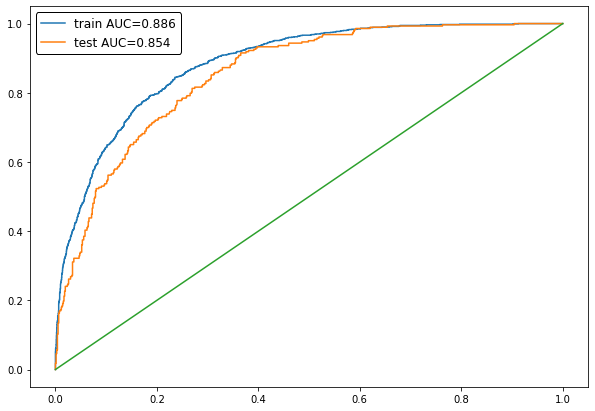

In [30]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.3f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.3f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [31]:
cat = catboost.CatBoostClassifier(cat_features=cat_cols,
        logging_level="Silent",
        eval_metric="AUC:hints=skip_train~false",
        grow_policy="Lossguide",
        metric_period=1000,
        random_seed=10,) 


PARAMS = {
    "n_estimators": [100, 150, 200, 250],
    "learning_rate": [0.03, 0.05, 0.07],
    "max_depth": [3, 5, 7, 10],
    "random_strength": [5],  
    "min_data_in_leaf": [50, 100, 150], 
}


cat.grid_search(PARAMS, data[feature_cols], data[target_col], cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8603566	best: 0.8603566 (0)	total: 618ms	remaining: 1m 28s
1:	loss: 0.8612856	best: 0.8612856 (1)	total: 1.27s	remaining: 1m 29s
2:	loss: 0.8645197	best: 0.8645197 (2)	total: 1.88s	remaining: 1m 28s
3:	loss: 0.8617869	best: 0.8645197 (2)	total: 2.8s	remaining: 1m 38s
4:	loss: 0.8627233	best: 0.8645197 (2)	total: 3.72s	remaining: 1m 43s
5:	loss: 0.8659206	best: 0.8659206 (5)	total: 4.62s	remaining: 1m 46s
6:	loss: 0.8631263	best: 0.8659206 (5)	total: 5.83s	remaining: 1m 54s
7:	loss: 0.8641241	best: 0.8659206 (5)	total: 7.05s	remaining: 1m 59s
8:	loss: 0.8661368	best: 0.8661368 (8)	total: 8.26s	remaining: 2m 3s
9:	loss: 0.8638636	best: 0.8661368 (8)	total: 9.8s	remaining: 2m 11s
10:	loss: 0.8651169	best: 0.8661368 (8)	total: 11.3s	remaining: 2m 17s
11:	loss: 0.8657067	best: 0.8661368 (8)	total: 12.8s	remaining: 2m 21s
12:	loss: 0.8601404	best: 0.8661368 (8)	total: 13.8s	remaining: 2m 19s
13:	loss: 0.8625193	best: 0.8661368 (8)	total: 14.8s	remaining: 2m 17s
14:	loss: 0.8660459

{'params': {'min_data_in_leaf': 150,
  'random_strength': 5,
  'depth': 10,
  'iterations': 200,
  'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0, 199],
              'test-AUC-mean': [0.7629785381761519, 0.8479992580187814],
              'test-AUC-std': [0.02171828578558322, 0.01637364581443502],
              'train-AUC-mean': [0.7640767779263223, 0.8720332624969892],
              'train-AUC-std': [0.010971892756214597, 0.003172766745973225],
              'test-Logloss-mean': [0.6691499939976799, 0.4104357804947922],
              'test-Logloss-std': [0.0008737061014064334,
               0.018047542771016015],
              'train-Logloss-mean': [0.6689416305164967, 0.38319419460813486],
              'train-Logloss-std': [0.0009895410636006161,
               0.003676698767844807]})}

In [33]:
cat_boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_feat, verbose=False)

cat_boosting_model.fit(X_train_origin, y_train)

y_train_predicted = cat_boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = cat_boosting_model.predict_proba(X_test_origin)[:, 1]

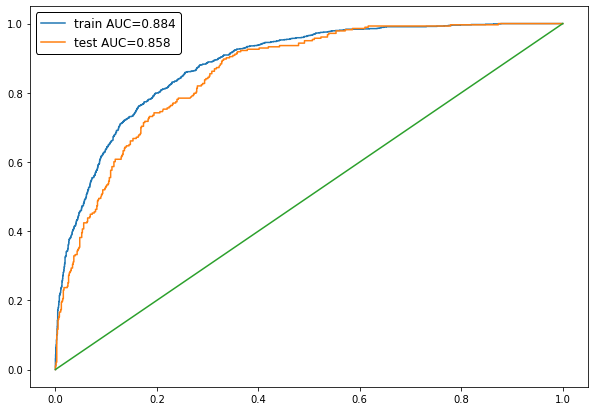

In [35]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.3f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.3f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Предсказания

In [36]:
best_model = cat

In [ ]:
X_test = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./submission.csv', index=False)

# Kaggle (5 баллов)


Score 

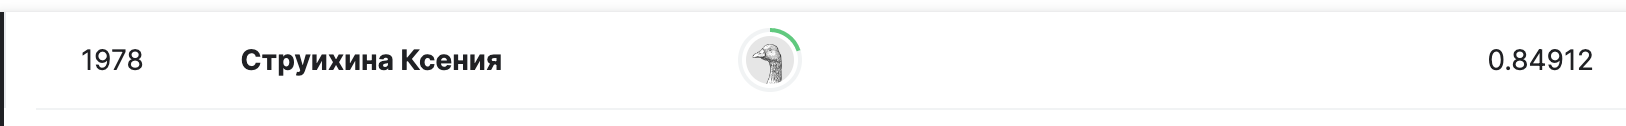